In [1]:
import sys
import time
from IPython.display import clear_output
import random
sys.path.append("../")
from pprint import pprint
from Core.maze import Maze, INF
from math import exp, sqrt
from matplotlib import pyplot as plt

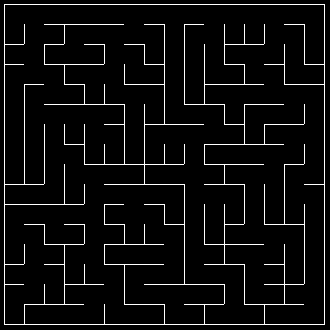

In [2]:
maze = Maze()
maze.load("Sidewinder_16x16.maze")
display(maze.draw(cell_width = 20))

In [3]:
# Implementation of DSU in Python
class dset:
    def __init__(self, data):
        self.data = data
        self.parent = self

    def find(self):
        if self.parent == self:
            return self

        return self.parent.find()

    def union(self, set2):
        p1 = self.find()
        p2 = set2.find()
        p1.parent = p2

In [4]:
def dynamic(maze, num):
    if num > maze.num_rows + maze.num_columns:
        num = maze.num_rows + maze.num_columns
    
    for i in range(0, num):
        while True:
            # Generate point in maze
            x = random.randint(0, maze.num_columns-1)
            y = random.randint(0, maze.num_rows-1)
            
            
            directions = []
            # Randomly check all walls
            if maze.grid[x][y].neighbors['N'] != INF:
                directions.append('N')
            if maze.grid[x][y].neighbors['S'] != INF:
                directions.append('S')
            if maze.grid[x][y].neighbors['E'] != INF:
                directions.append('E')
            if maze.grid[x][y].neighbors['W'] != INF:
                directions.append('W')
            
            if len(directions) == 0:
                continue
           
            direction = random.choice(directions)
            maze.add_path((y, x), direction, INF) 
            break
    
    
    color = []
    for i in range(0, maze.num_rows):
        color.append([])
        for j in range(0, maze.num_columns):
            color[i].append(-1)
    
    cur = 0
    for x in range(0, maze.num_rows):
        for y in range(0, maze.num_columns):
            if color[x][y] == -1:
                queue = []
                queue.append((x, y))
                while len(queue):                        
                    cx, cy = queue.pop(0)
                    if color[cx][cy] == cur:
                        continue
                    color[cx][cy] = cur
                    if cx != 0 and maze.grid[cx][cy].neighbors['N'] != INF and color[cx-1][cy] == -1:
                        queue.append((cx-1, cy))
                    if cx != maze.num_rows-1 and maze.grid[cx][cy].neighbors['S'] != INF and color[cx+1][cy] == -1:
                        queue.append((cx+1, cy))
                    if cy != 0 and maze.grid[cx][cy].neighbors['W'] != INF and color[cx][cy-1] == -1:
                        queue.append((cx, cy-1))
                    if cy != maze.num_columns-1 and maze.grid[cx][cy].neighbors['E'] != INF and color[cx][cy+1] == -1:
                        queue.append((cx, cy+1))
                cur += 1
    edges = []
    for x in range(0, maze.num_rows):
        for y in range(0, maze.num_columns):
            if x != maze.num_rows-1 and maze.grid[x][y].neighbors['S'] == INF and color[x+1][y] != color[x][y]:
                edges.append((x, y, 'S'))
            if y != maze.num_columns-1 and maze.grid[x][y].neighbors['E'] == INF and color[x][y+1] != color[x][y]:
                edges.append((x, y, 'E'))
    
    dsu = [dset((i)) for i in range(0, cur)]
    
    count = 0
    
    while len(edges):
        x, y, direction = random.choice(edges)
        edges.remove((x, y, direction))
        if direction == 'S' and dsu[color[x][y]].find() != dsu[color[x+1][y]].find():
            maze.add_path((y, x), 'S', 0)
            dsu[color[x][y]].union(dsu[color[x+1][y]])
            count += 1
        if direction == 'E' and dsu[color[x][y]].find() != dsu[color[x][y+1]].find():
            maze.add_path((y, x), 'E', 0)
            dsu[color[x][y]].union(dsu[color[x][y+1]])
            count += 1

In [5]:
def dynam_solver(maze, start, end, dynam_count,dynam_factor, draw):
    if dynam_count < 1:
        dynam_count = 1
    count = 0
    
    # arbitrary_experimental_constant = sqrt(20)
    c = sqrt(20)
    rand_check = (dynam_factor/(maze.num_columns+maze.num_rows)) * c/sqrt(dynam_count)
    if rand_check < 0.1:
        rand_check = 0.1
    #thresh = 1 - exp(-0.1*dynam_count)
    cx, cy = start
    dx, dy = end
    #previous = 'X'
    
    while cx != dx or cy != dy:
        if draw:
            clear_output(wait=True)
            maze.add_colors(path = [(cy,cx)])
            display(maze.draw(cell_width = 20))
            maze.add_colors(color = (0,0,0), path =[(cy,cx)])
        #print(cx,cy,maze.grid[cy][cx].neighbors['W'],maze.grid[cy][cx].neighbors['N'],maze.grid[cy][cx].neighbors['E'],maze.grid[cy][cx].neighbors['S'])
        dir_list = []
        if cx != 0 and maze.grid[cy][cx].neighbors['W'] != INF:
            if cx - dx > 0 and random.random() < rand_check:
                dir_list.append('W')
            dir_list.append('W')
        if cy != 0 and maze.grid[cy][cx].neighbors['N'] != INF:
            if cy - dy > 0 and random.random() < rand_check:
                dir_list.append('N')
            dir_list.append('N')
        if cx != maze.num_columns - 1 and maze.grid[cy][cx].neighbors['E'] != INF:
            if cx - dx < 0 and random.random() < rand_check:
                dir_list.append('E')
            dir_list.append('E')
        if cy != maze.num_rows - 1 and maze.grid[cy][cx].neighbors['S'] != INF:
            if cy - dy < 0 and random.random() < rand_check:
                dir_list.append('S')
            dir_list.append('S')
        
       # if len(dir_list) != 1:
        #    if previous in dir_list and random.random() < thresh:
        #        dir_list.remove(previous)
        
        cho = random.choice(dir_list)
        if cho == 'W':
            cx-=1
        elif cho == 'N':
            cy-=1
        elif cho == 'E':
            cx+=1
        else:
            cy+=1
        count += 1
        if count % dynam_count == 0:
            dynamic(maze, dynam_factor) 
    if draw:
        clear_output(wait=True)
        maze.add_colors(path = [(cy,cx)])
        display(maze.draw(cell_width = 20))
        maze.add_colors(color = (0,0,0), path =[(cy,cx)])
    #print(rand_check)
    return count

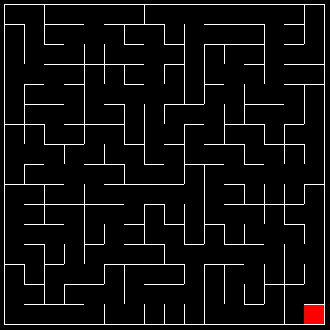

236


In [7]:
start = (0, 0)
end = (15, 15)
cnt = 33
m = maze.num_rows + maze.num_columns
count = dynam_solver(maze, start, end, cnt, m, 1)
print(count)

In [27]:
time_list = []
for i in range(0, 1000):
    m = maze.num_rows + maze.num_columns
    cnt = random.randint(1, 100)
    temp = dynam_solver(maze, start, end, cnt, m, 0)
    time_list.append((cnt, temp))

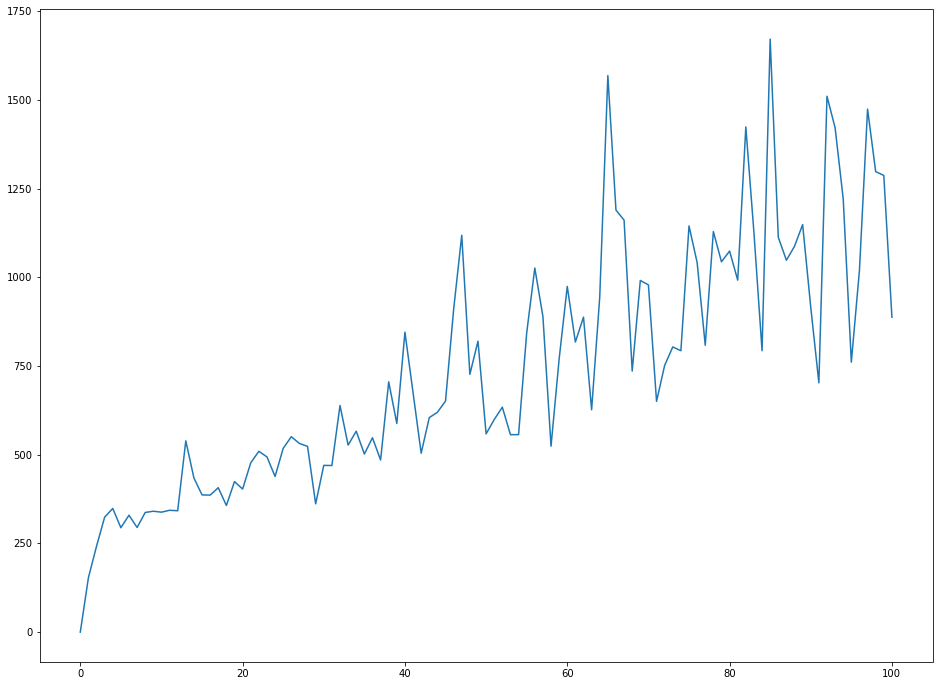

In [28]:
freq = [0]*101
total_time = [0]*101
for i in time_list:
    cnt, time_taken = i
    freq[cnt] += 1
    total_time[cnt] += time_taken
avg = []
for i in range(0, len(freq)):
    if freq[i] != 0:
        avg.append(total_time[i]/freq[i])
    else:
        avg.append(0)
x = list(range(0, 101))
plt.figure(figsize=(16,12))
plt.plot(x, avg)

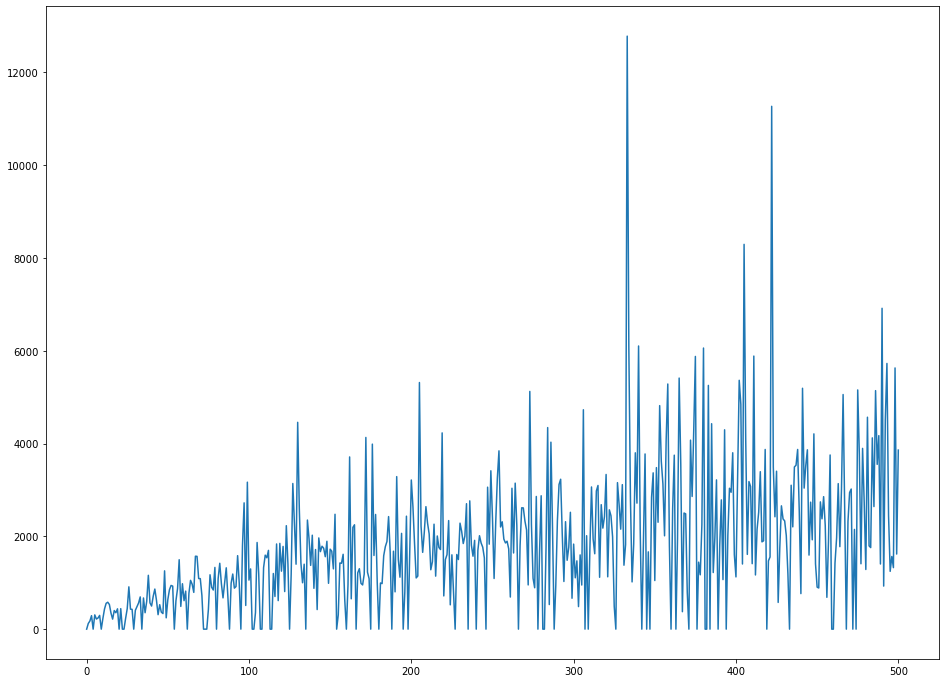

In [32]:
time_list = []
for i in range(0, 1000):
    m = maze.num_rows + maze.num_columns
    cnt = random.randint(1, 500)
    temp = dynam_solver(maze, start, end, cnt, m, 0)
    time_list.append((cnt, temp))
freq = [0]*501
total_time = [0]*501
for i in time_list:
    cnt, time_taken = i
    freq[cnt] += 1
    total_time[cnt] += time_taken
avg = []
for i in range(0, len(freq)):
    if freq[i] != 0:
        avg.append(total_time[i]/freq[i])
    else:
        avg.append(0)
x = list(range(0, 501))
plt.figure(figsize=(16,12))
plt.plot(x, avg)

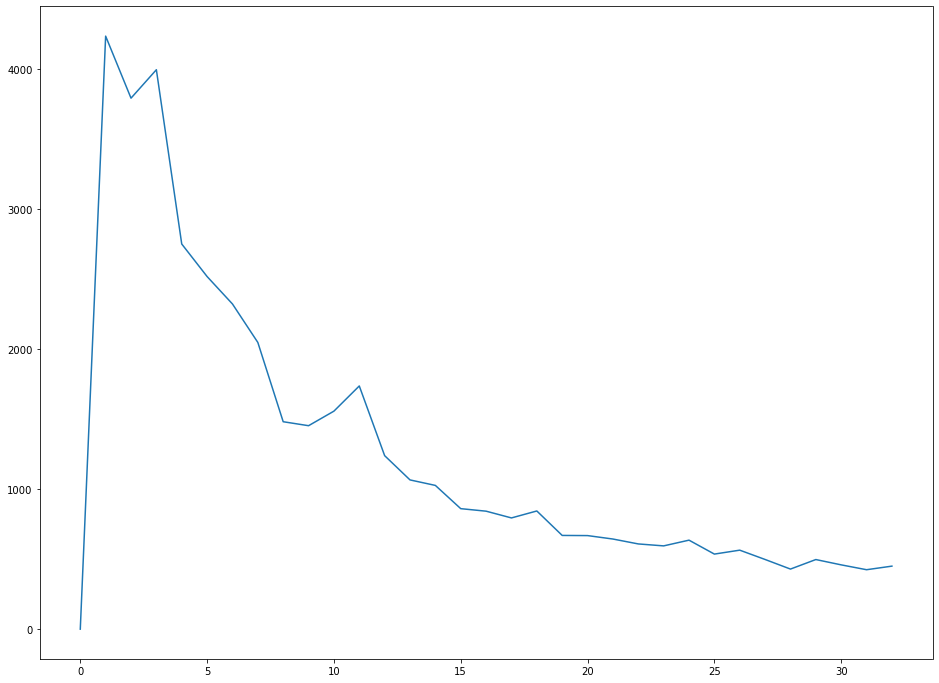

In [35]:
time_list = []
for i in range(0, 1000):
    m = random.randint(1, maze.num_columns+ maze.num_rows)
    temp = dynam_solver(maze, start, end, 20, m, 0)
    time_list.append((m, temp))
freq = [0]*33
total_time = [0]*33
for i in time_list:
    m, time_taken = i
    freq[m] += 1
    total_time[m] += time_taken
avg = []
for i in range(0, len(freq)):
    if freq[i] != 0:
        avg.append(total_time[i]/freq[i])
    else:
        avg.append(0)
x = list(range(0, 33))
plt.figure(figsize=(16,12))
plt.plot(x, avg)

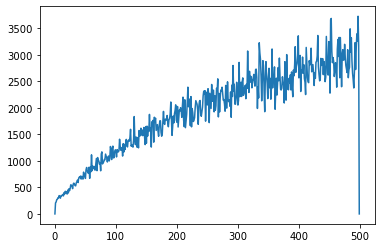

In [23]:
time_list = [0]*500

for i in range(1, 499):
    for j in range(1, 50):
        m = maze.num_columns+maze.num_rows
        temp = dynam_solver(maze, start, end, i, m, 0)
        time_list[i] += temp
for i in range(len(time_list)):
    time_list[i] /= 50
x = [i for i in range(0, 500)]
plt.plot(x, time_list)